# Step A: Data Preprocessing

### import the libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator

### import the dataset

In [2]:
data = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)
training_set = data.flow_from_directory('Train_data',
                                       target_size = (32, 32),
                                       color_mode="rgb",
                                       batch_size = 12,
                                       class_mode = 'binary')

Found 7144 images belonging to 2 classes.


In [3]:
data2 = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)
test_set = data2.flow_from_directory('Test_data',
                                       target_size = (32, 32),
                                       color_mode="rgb",
                                       batch_size = 12,
                                       class_mode = 'binary')

Found 2000 images belonging to 2 classes.


# Step B: CNN Model


## Building the CNN Model

### Initialising the CNN

In [4]:
cnn_model = tf.keras.models.Sequential()

### Convolution

In [5]:
cnn_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu',input_shape = [32, 32, 3]))

### Pooling

In [6]:
cnn_model.add(MaxPooling2D(pool_size=2,strides=2))

### Adding a second convolution layer

In [7]:
cnn_model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))            

### Flattening

In [8]:
cnn_model.add(Flatten())

### Full Connection

In [9]:
cnn_model.add(Dense(32,activation='relu'))

### Output Layer

In [10]:
cnn_model.add(Dense(units=1,activation='sigmoid'))

### Compile the model

In [11]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [12]:
history = cnn_model.fit(training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
596/596 [==============================] - 28s 45ms/step - loss: 0.6715 - accuracy: 0.5892 - val_loss: 0.6504 - val_accuracy: 0.6210
Epoch 2/25
596/596 [==============================] - 21s 35ms/step - loss: 0.6308 - accuracy: 0.6461 - val_loss: 0.6123 - val_accuracy: 0.6780
Epoch 3/25
596/596 [==============================] - 21s 36ms/step - loss: 0.6030 - accuracy: 0.6719 - val_loss: 0.5876 - val_accuracy: 0.6975
Epoch 4/25
596/596 [==============================] - 20s 34ms/step - loss: 0.5767 - accuracy: 0.6918 - val_loss: 0.5733 - val_accuracy: 0.7030
Epoch 5/25
596/596 [==============================] - 19s 31ms/step - loss: 0.5599 - accuracy: 0.7140 - val_loss: 0.5477 - val_accuracy: 0.7315
Epoch 6/25
596/596 [==============================] - 19s 32ms/step - loss: 0.5402 - accuracy: 0.7240 - val_loss: 0.5449 - val_accuracy: 0.7220
Epoch 7/25
596/596 [==============================] - 20s 33ms/step - loss: 0.5355 - accuracy: 0.7283 - val_loss: 0.5730 - val_accuracy:

### Plotting the Training Loss and Accuracy

Text(0.5, 1.0, 'plot of loss function')

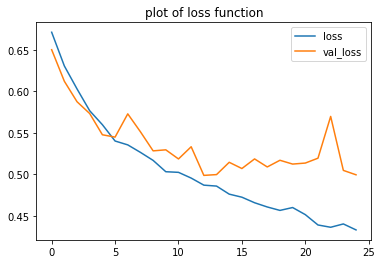

In [13]:
model_losses= pd.DataFrame(cnn_model.history.history)
model_losses['loss']
plt.plot(model_losses['loss'],label='loss')
plt.plot(model_losses['val_loss'],label='val_loss')
plt.legend()
plt.title('plot of loss function')


Text(0.5, 1.0, 'plot of accuracy function')

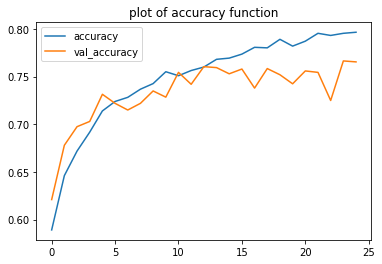

In [14]:
plt.plot(model_losses['accuracy'],label='accuracy')
plt.plot(model_losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('plot of accuracy function')

<AxesSubplot:>

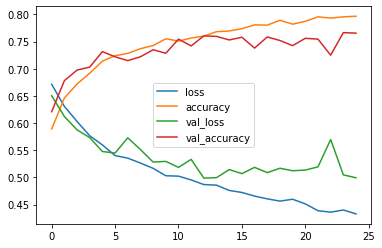

In [15]:
model_losses.plot()

### Evaluate/Score the model

In [16]:
score = cnn_model.evaluate(test_set,verbose=0)
score

[0.5055294632911682, 0.7570000290870667]

In [17]:
print('Test Loss: {:.2f}'.format(score[0]))
print('Test Accuracy: {:.2f}'.format(score[1]))

Test Loss: 0.51
Test Accuracy: 0.76


## Prediction

In [31]:
from keras.preprocessing.image import image_utils
predict_image = image_utils.load_img('Prediction Input/cat_or_dog_1.jpg',target_size = (32,32))
print(predict_image.mode)
print(predict_image.size)

RGB
(32, 32)


In [32]:
predict_image = image_utils.img_to_array(predict_image)
print(predict_image.dtype)
print(predict_image.shape)
predict_image = np.expand_dims(predict_image,axis = 0)
result = cnn_model.predict(predict_image)

float32
(32, 32, 3)
1/1 [==============================] - 0s 82ms/step


### What the class values represent

In [33]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [34]:
if result[0][0] == 1:
    prediction = 'Dog'
    print(prediction)
else:
    prediction = 'Cat'
    print(prediction)

Dog
